0      2015-01-01
1      2015-01-02
2      2015-01-03
3      2015-01-04
4      2015-01-05
          ...    
3096   2023-06-24
3097   2023-06-25
3098   2023-06-26
3099   2023-06-27
3100   2023-06-28
Name: timestamp, Length: 3101, dtype: datetime64[ns]


Text(0.5, 1.0, 'Price Trend')

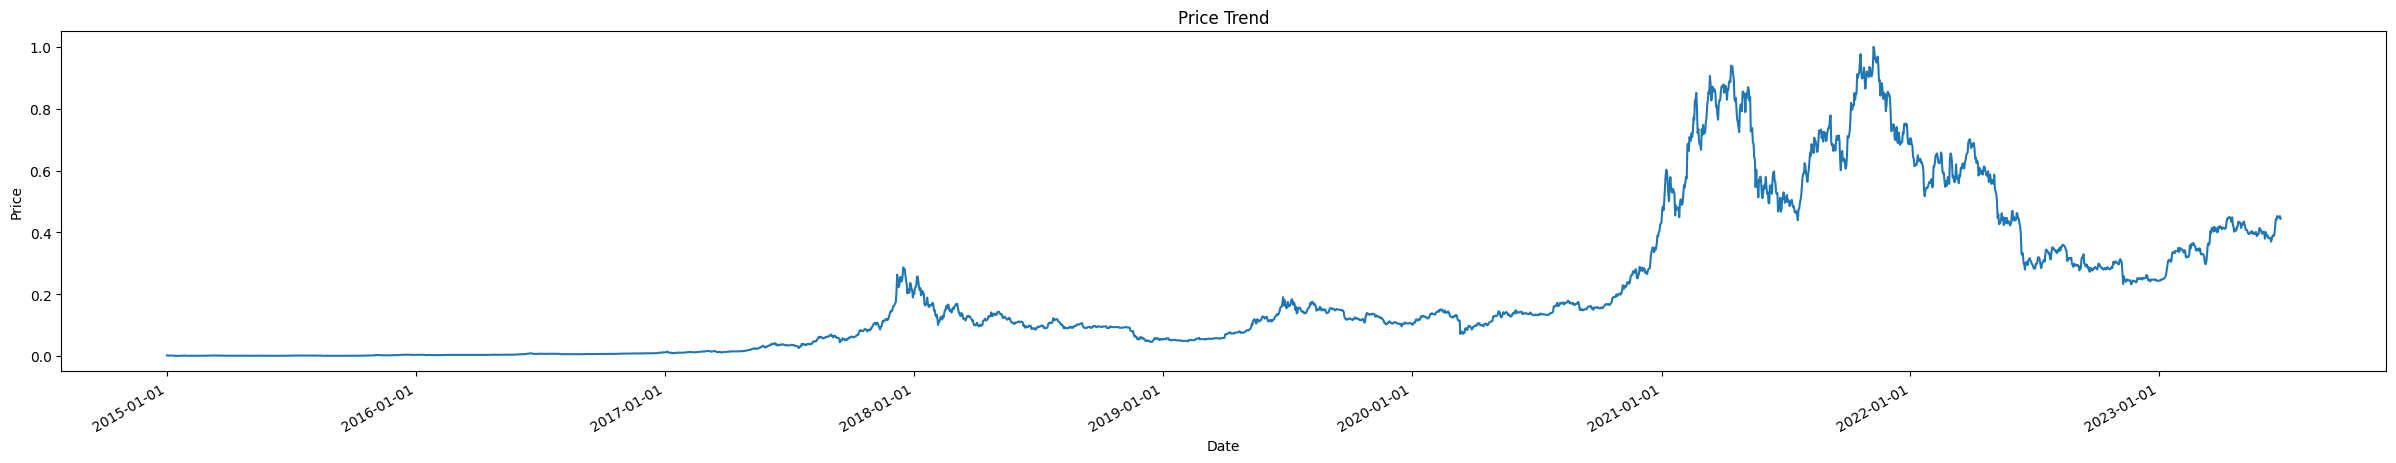

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler
data_path = 'data/all_filter_update_2500.csv'
df = pd.read_csv('data/BTC-USD.csv')
df['timestamp'] = df['Date']
df['value'] = df['Close']


# df = pd.read_csv('data/Price_OHLC.csv')
# df['value'] = df['o']

df['timestamp'] = pd.to_datetime(df['timestamp'])

scaler = MinMaxScaler()
df[['value']]= scaler.fit_transform(df[['value']])

# start_date = pd.to_datetime('2020-01-01')
# end_date = pd.to_datetime('2023-05-31')
# df = df[(df['timestamp']>= start_date) & (df['timestamp'] <= end_date)]
df = df.sort_values('timestamp', ascending=True)


# filtered_df = df.loc[(df['timestamp'] >= start_date) & (df['timestamp'] <= end_date)]

# window_size = 7 # 窗口大小
# # sentiment['pos'] = sentiment['pos'].rolling(window_size).mean()

# df['value'] = df['value'].rolling(window_size).mean()
# df.set_index('timestamp', inplace=True)
# df.index = df.index.shift(window_size, freq='D')
# sentiment = df.reset_index()



print(df['timestamp'])
dates = list(df['timestamp'])
prices = list(df['value'])

# prices
# 绘制价格走势图
plt.figure(figsize=(30, 5))
plt.plot(dates, prices)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price Trend')

# plt.xlim(pd.Timestamp('2020-01-01'), pd.Timestamp('2023-05-31'))


# 价格走势

                         id  \
0       1212489772763095040   
1       1212504656305242112   
2       1212504662382796800   
3       1212504697250168833   
4       1212504764744896513   
...                     ...   
855555  1665585237022199809   
855556  1665633896594124800   
855557  1665685201190629376   
855558  1665703162597244929   
855559  1666022118239137793   

                                                full_text  \
0       They should give my man more glucose. Lucas To...   
1       McAfee’s Prediction: Only 365 Days Left, Bitco...   
2       Bitcoin Closed Q4 in Losses; Two Major Catalys...   
3       4 Reasons Why Bitcoin Was Just Warming Up in t...   
4       Bitcoin custody on Lightning is counter to sys...   
...                                                   ...   
855555  GM ☀️\n\nLet's make this a month of exciting o...   
855556  Tune in at 10am UTC on June 6th for the premie...   
855557  Disaster Recovery for PostgreSQL on Kubernetes...   
855558  👋 Say goo

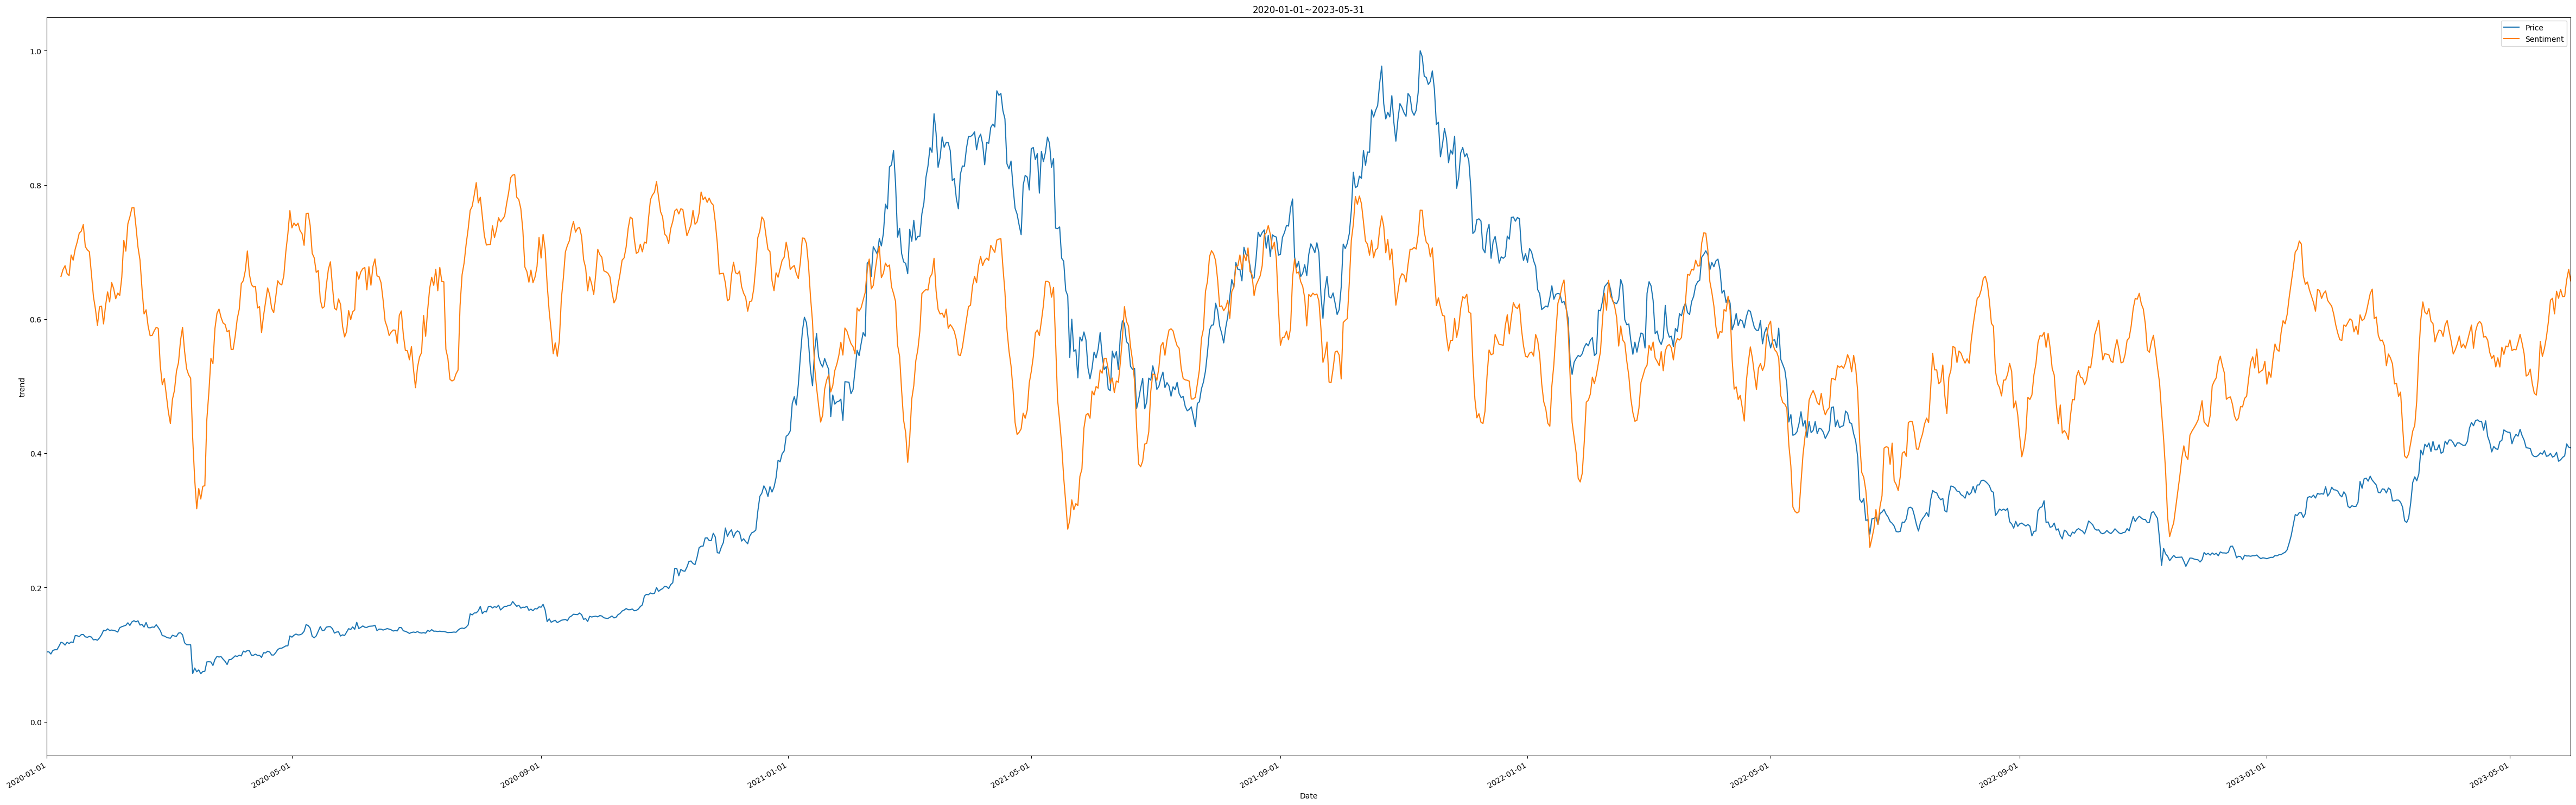

1240
皮尔森相关系数为: -0.012353066967642217


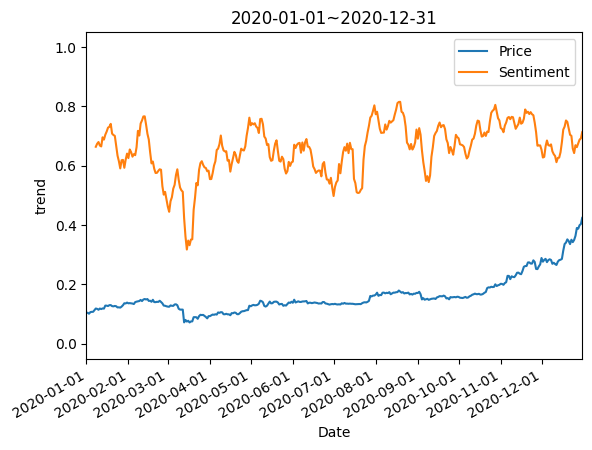

359
皮尔森相关系数为: 0.4264511343772823


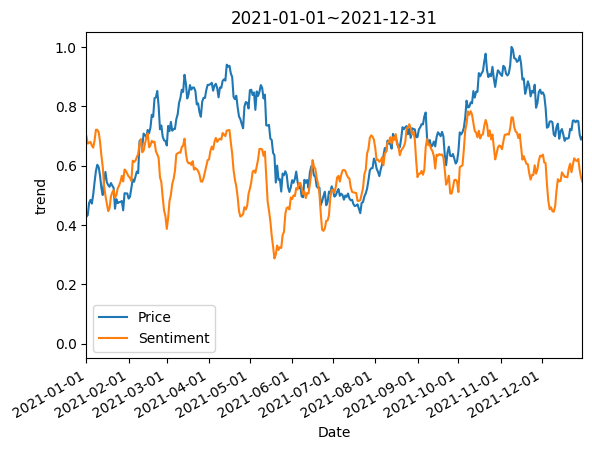

365
皮尔森相关系数为: 0.4958980290916824


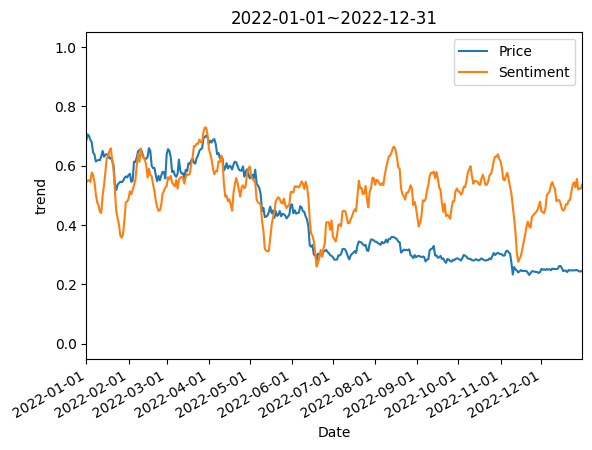

365
皮尔森相关系数为: 0.4276921820512542


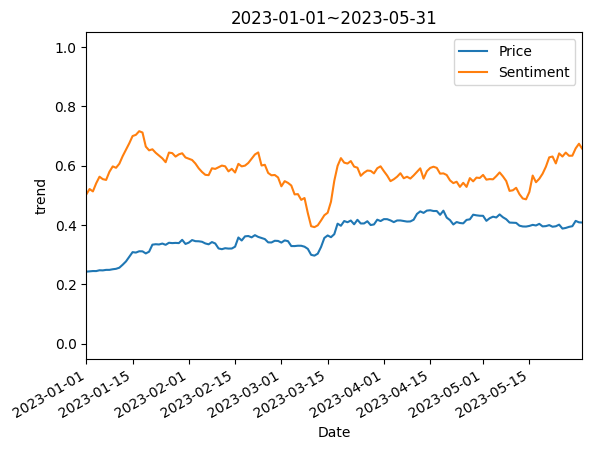

151
皮尔森相关系数为: -0.00028673390738280643


In [5]:
import re
from sklearn.preprocessing import MinMaxScaler
import numpy as np
sentiment = pd.read_csv(data_path,lineterminator='\n')
# sentiment = pd.read_csv('data/all_filter.csv',lineterminator='\n')
print(sentiment)
sentiment = sentiment[sentiment['scores'].notnull()]
# filter
print(len(sentiment))
sentiment = sentiment[sentiment['label'] == 1]
print(len(sentiment))

print(len(sentiment))
thr = 100
sentiment = sentiment[(sentiment['user_follower_count'] > thr) | (sentiment['favorite_count'] > thr) | (sentiment['quote_count'] > thr) | (sentiment['reply_count'] > thr) | (sentiment['retweet_count'] > thr)]
print(len(sentiment))

sentiment['date'] = pd.to_datetime(sentiment['day'])
# 将日期列设置为索引
sentiment.set_index('date', inplace=True)
sentiment['scores']  = sentiment['scores'].astype('str')
# sentiment['pos'] = sentiment['scores'].str.split('\n').map(lambda row: float(row[0][4:]) if row[0][4:] else 0)
sentiment['pos'] = sentiment['scores'].str.split('\n').map(lambda row: float(row[0][4:]))
sentiment['neg'] = sentiment['scores'].str.split('\n').map(lambda row: float(row[1][4:]))
sentiment['neu'] = sentiment['scores'].str.split('\n').map(lambda row: float(row[2][4:]))
sentiment['metrics'] = sentiment['pos'] - sentiment['neg']
# print(sentiment)
# print(sentiment.groupby(sentiment.index)['date'])
# 按天求和
sentiment = sentiment.groupby(sentiment.index)['metrics'].mean().reset_index()
# sentiment = sentiment['metrics']
print(sentiment)
# 过滤outlier
# sentiment = sentiment[sentiment['metrics']>10000]
# sentiment = sentiment[sentiment['metrics']<16000]
# 归一化
scaler = MinMaxScaler()
sentiment[['metrics']]= scaler.fit_transform(sentiment[['metrics']])



# test = pd.merge(sentiment,df,left_on='date',right_on='timestamp')
# print(test.columns)
# test[['date','value','metrics']].to_csv('metrics.csv',index=False)





# 滑动窗口平滑
window_size = 7 # 窗口大小
sentiment['metrics'] = sentiment['metrics'].rolling(window_size).mean()
# sentiment['pos'] = sentiment['pos'].iloc[::-1].rolling(window_size).mean()[::-1]
# print(sentiment['pos'])
# 平移
sentiment.set_index('date', inplace=True)
sentiment.index = sentiment.index.shift(1, freq='D')
sentiment = sentiment.reset_index()
# sentiment['date'] = sentiment['date'].shift(7, freq='D')
# 绘制价格走势图
trend = sentiment['metrics'].tolist()
sen_dates = sentiment['date'].tolist()

def show_trend(start, end, flag):
    if flag == 1:
        plt.figure(figsize=(60, 20))
    plt.plot(dates, prices,label='Price')
    # plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    # plt.gcf().autofmt_xdate()
    # plt.xlabel('Date')
    # plt.ylabel('Price')
    # plt.title('Price Trend')
    # plt.xlim(pd.Timestamp(START), pd.Timestamp(END))


    plt.plot(sen_dates, trend,label='Sentiment')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gcf().autofmt_xdate()
    plt.xlabel('Date')
    plt.ylabel('trend')
    plt.title(start+'~'+end)
    plt.xlim(pd.Timestamp(start), pd.Timestamp(end))
    plt.legend()
    plt.show()

    global sentiment
    sentiment = sentiment[sentiment['metrics'].notnull()]
    join = pd.merge(sentiment,df,left_on='date',right_on='timestamp')
    join = join[(join['date']>= pd.Timestamp(start)) & (join['date'] <= pd.Timestamp(end))]
    # print(join)
    
    t1 = join['metrics'].to_list()
    t2 = join['value'].to_list()
    date = join['date'].to_list()
    corr = np.corrcoef(t1, t2)[0, 1]
    print(len(date))
    print("皮尔森相关系数为:", corr)
show_trend('2020-01-01', '2023-05-31', 1)
show_trend('2020-01-01', '2020-12-31', 0)
show_trend('2021-01-01', '2021-12-31', 0)
show_trend('2022-01-01', '2022-12-31', 0)
show_trend('2023-01-01', '2023-05-31', 0)

# 差分走势

[nan, nan, nan, nan, nan, nan, nan, 0.0164292131947118, -0.05981260428699775, -0.08176100628930816, 0.09472468232576037, -0.09074573225516613, 0.0040431266846361336, -0.003593890386343279, 0.005647542035682296, -0.05140546784751643, 0.07977153125401104, 0.00032088307020927687, 0.08496983699140037, 0.04871005005775886, 0.01578744705429347, 0.0023103581055063938, 0.04485945321524831, -0.10030804774740076, -0.12129380053908367, 0.0034655371582595906, -0.07457322551662177, 0.007059427544602759, -0.11705814401232201, -0.048581696829675225, 0.10024387113335903, 0.12931587729431393, -0.045148247978436695, -0.018418688230008917, -0.053352158473452316, 0.016750096264921077, 0.06950327300731612, -0.07306507508663845, -0.11692979078423815, -0.06343858298036201, -6.417661404184427e-05, -0.018076412955119137, 0.030997304582210256, 0.044217687074829926, 0.07075471698113212, 0.01873957130021814, 0.002502887947631871, -0.018418688230008973, 0.08394301116673086, 0.06353484790142466, -0.0459504556539596

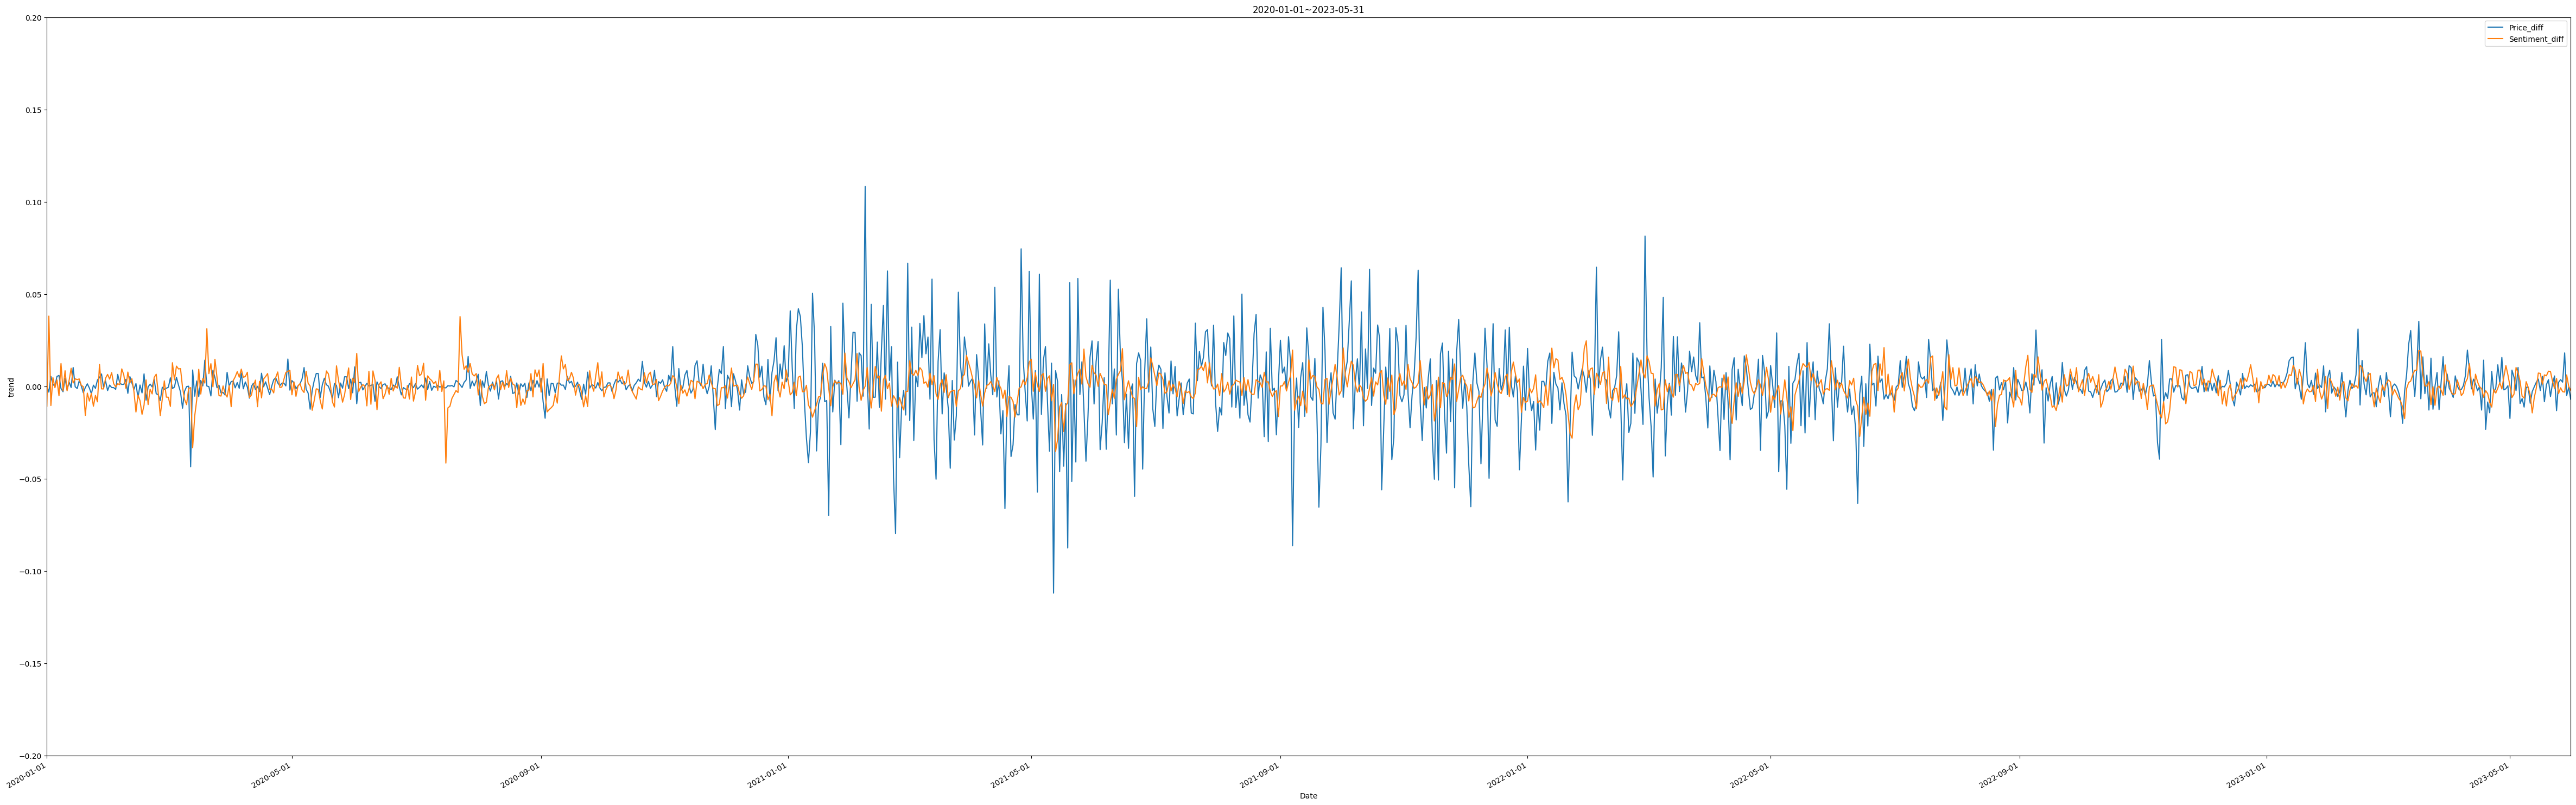

0.4739374498797113
1247
皮尔森相关系数为: 0.023609083995430113


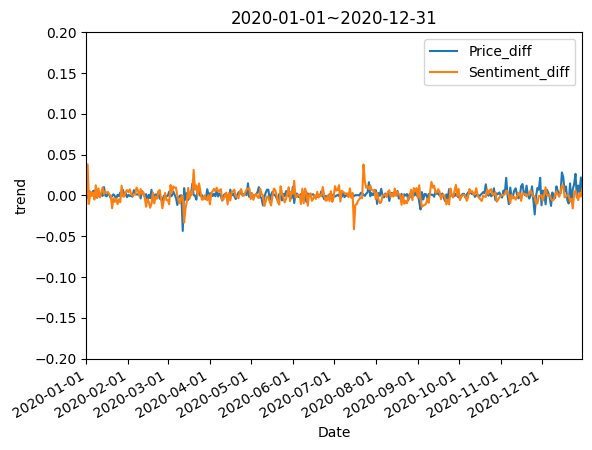

0.4672131147540984
366
皮尔森相关系数为: -0.01241058412569406


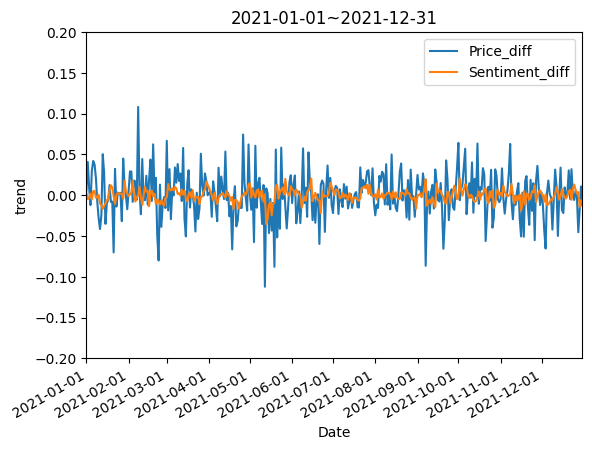

0.473972602739726
365
皮尔森相关系数为: 0.018499569248061665


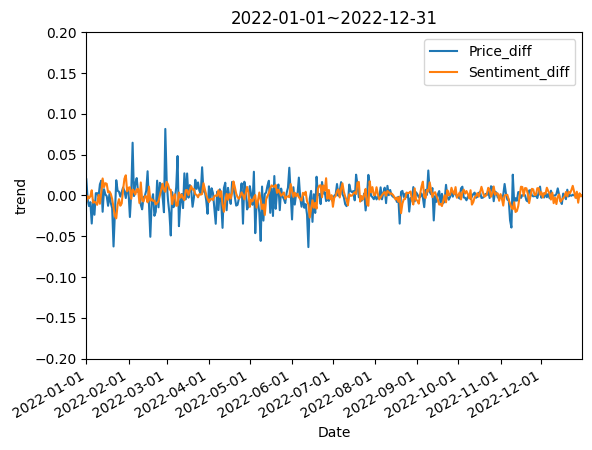

0.46301369863013697
365
皮尔森相关系数为: 0.035310622563644437


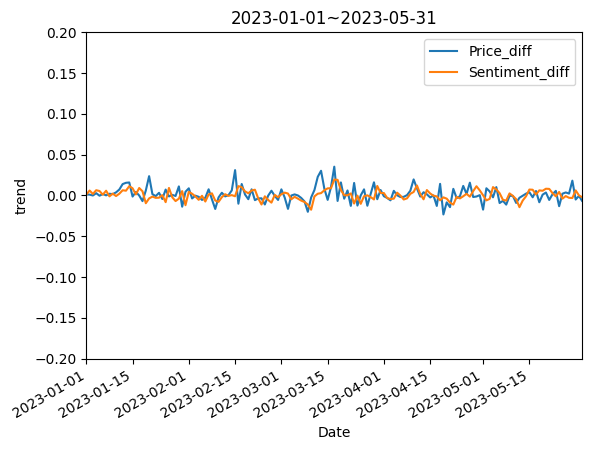

0.5165562913907285
151
皮尔森相关系数为: 0.13324065637499521


In [6]:
import re
from sklearn.preprocessing import MinMaxScaler
import numpy as np
sentiment = pd.read_csv(data_path)
sentiment = sentiment[sentiment['scores'].notnull()]
# filter
# print(len(sentiment))
# sentiment = sentiment[sentiment['label'] == 1]
# print(len(sentiment))

# print(len(sentiment))
# thr = 100
# sentiment = sentiment[(sentiment['user_follower_count'] > thr) | (sentiment['favorite_count'] > thr) | (sentiment['quote_count'] > thr) | (sentiment['reply_count'] > thr) | (sentiment['retweet_count'] > thr)]
# print(len(sentiment))

sentiment['date'] = pd.to_datetime(sentiment['day'])
# 将日期列设置为索引
sentiment.set_index('date', inplace=True)
sentiment['scores']  = sentiment['scores'].astype('str')
# sentiment['pos'] = sentiment['scores'].str.split('\n').map(lambda row: float(row[0][4:]) if row[0][4:] else 0)
sentiment['pos'] = sentiment['scores'].str.split('\n').map(lambda row: float(row[0][4:]))
sentiment['neg'] = sentiment['scores'].str.split('\n').map(lambda row: float(row[1][4:]))
sentiment['neu'] = sentiment['scores'].str.split('\n').map(lambda row: float(row[2][4:]))
sentiment['metrics'] = sentiment['pos'] - sentiment['neg']
# print(sentiment)
# print(sentiment.groupby(sentiment.index)['date'])
# 按天求和
sentiment = sentiment.groupby(sentiment.index)['metrics'].mean().reset_index()
# sentiment = sentiment['metrics']
# print(sentiment)
# 过滤outlier
# sentiment = sentiment[sentiment['metrics']>10000]
# sentiment = sentiment[sentiment['metrics']<16000]
# 归一化
scaler = MinMaxScaler()
sentiment[['metrics']]= scaler.fit_transform(sentiment[['metrics']])
# 滑动窗口平滑
window_size = 7 # 窗口大小
sentiment['metrics'] = sentiment['metrics'].rolling(window_size).mean()
# diff计算
# print(sentiment['metrics'][0:10])
sentiment['metrics_diff'] = sentiment['metrics'].diff()
# sentiment = sentiment[sentiment['metrics_diff'] < 9999]

# 平移
sentiment.set_index('date', inplace=True)
sentiment.index = sentiment.index.shift(1, freq='D')
sentiment = sentiment.reset_index()
# print(sentiment[sentiment['metrics_return'] > 1])

df['value_diff'] = df['value'].diff()


# print(df[df['value_return'] > 1])
# df['value']
# price_return[0:10]


# 绘制价格走势图
trend = sentiment['metrics_diff'].tolist()
sen_dates = sentiment['date'].tolist()
dates = list(df['timestamp'])
prices = list(df['value_diff'])
print(trend)
print(prices)
def show_trend(start, end, flag):
    if flag == 1:
        plt.figure(figsize=(60, 20))
    plt.plot(dates, prices,label='Price_diff')

    plt.plot(sen_dates, trend,label='Sentiment_diff')

    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gcf().autofmt_xdate()
    plt.xlabel('Date')
    plt.ylabel('trend')
    plt.title(start+'~'+end)
    plt.ylim(-0.2,0.2)
    plt.xlim(pd.Timestamp(start), pd.Timestamp(end))
    plt.legend()
    plt.show()

    global sentiment
    sentiment = sentiment[sentiment['metrics_diff'].notnull()]
    join = pd.merge(sentiment,df,left_on='date',right_on='timestamp')
    join = join[(join['date']>= pd.Timestamp(start)) & (join['date'] <= pd.Timestamp(end))]
    # print(join)
    
    t1 = join['metrics_diff'].to_list()
    t2 = join['value_diff'].to_list()
    date = join['date'].to_list()
    corr = np.corrcoef(t1, t2)[0, 1]
    good = 0
    for i in range(len(t1)):
        if t1[i] * t2[i] > 0:
            good = good + 1
    print(good/len(t1))
    print(len(date))
    print("皮尔森相关系数为:", corr)
show_trend('2020-01-01', '2023-05-31', 1)
show_trend('2020-01-01', '2020-12-31', 0)
show_trend('2021-01-01', '2021-12-31', 0)
show_trend('2022-01-01', '2022-12-31', 0)
show_trend('2023-01-01', '2023-05-31', 0)

# return走势

Index(['id', 'full_text', 'created_at', 'favorite_count', 'quote_count',
       'reply_count', 'retweet_count', 'user_id', 'user_name',
       'user_screen_name', 'user_description', 'user_friends_count',
       'user_follower_count', 'user_favorite_count', 'user_media_count',
       'cursor', 'period', 'second', 'month', 'day\r', 'day', 'pred', 'scores',
       'prob', 'label', 'source\r\r'],
      dtype='object')
2981357
1841668
1841668
1571604
[2.386973180076628, -0.6736425339366516, 1.7573656845753902, 0.18918918918918926, -0.8641649048625792, -0.5603112840466924, 15.274336283185832, -0.5872756933115824, -0.9104084321475624, 0.6764705882352904, 14.956140350877194, -0.7405167674546455, -0.3008474576271186, -0.0030303030303028278, 1.06838905775076, -0.550330639235856, 0.9215686274509802, 0.38095238095238093, -0.770935960591133, -0.01075268817204289, 9.304347826086957, -0.04957805907172996, -0.35072142064372913, 0.5478632478632479, 0.04362230811706236, -0.7063492063492063, 1.365765765

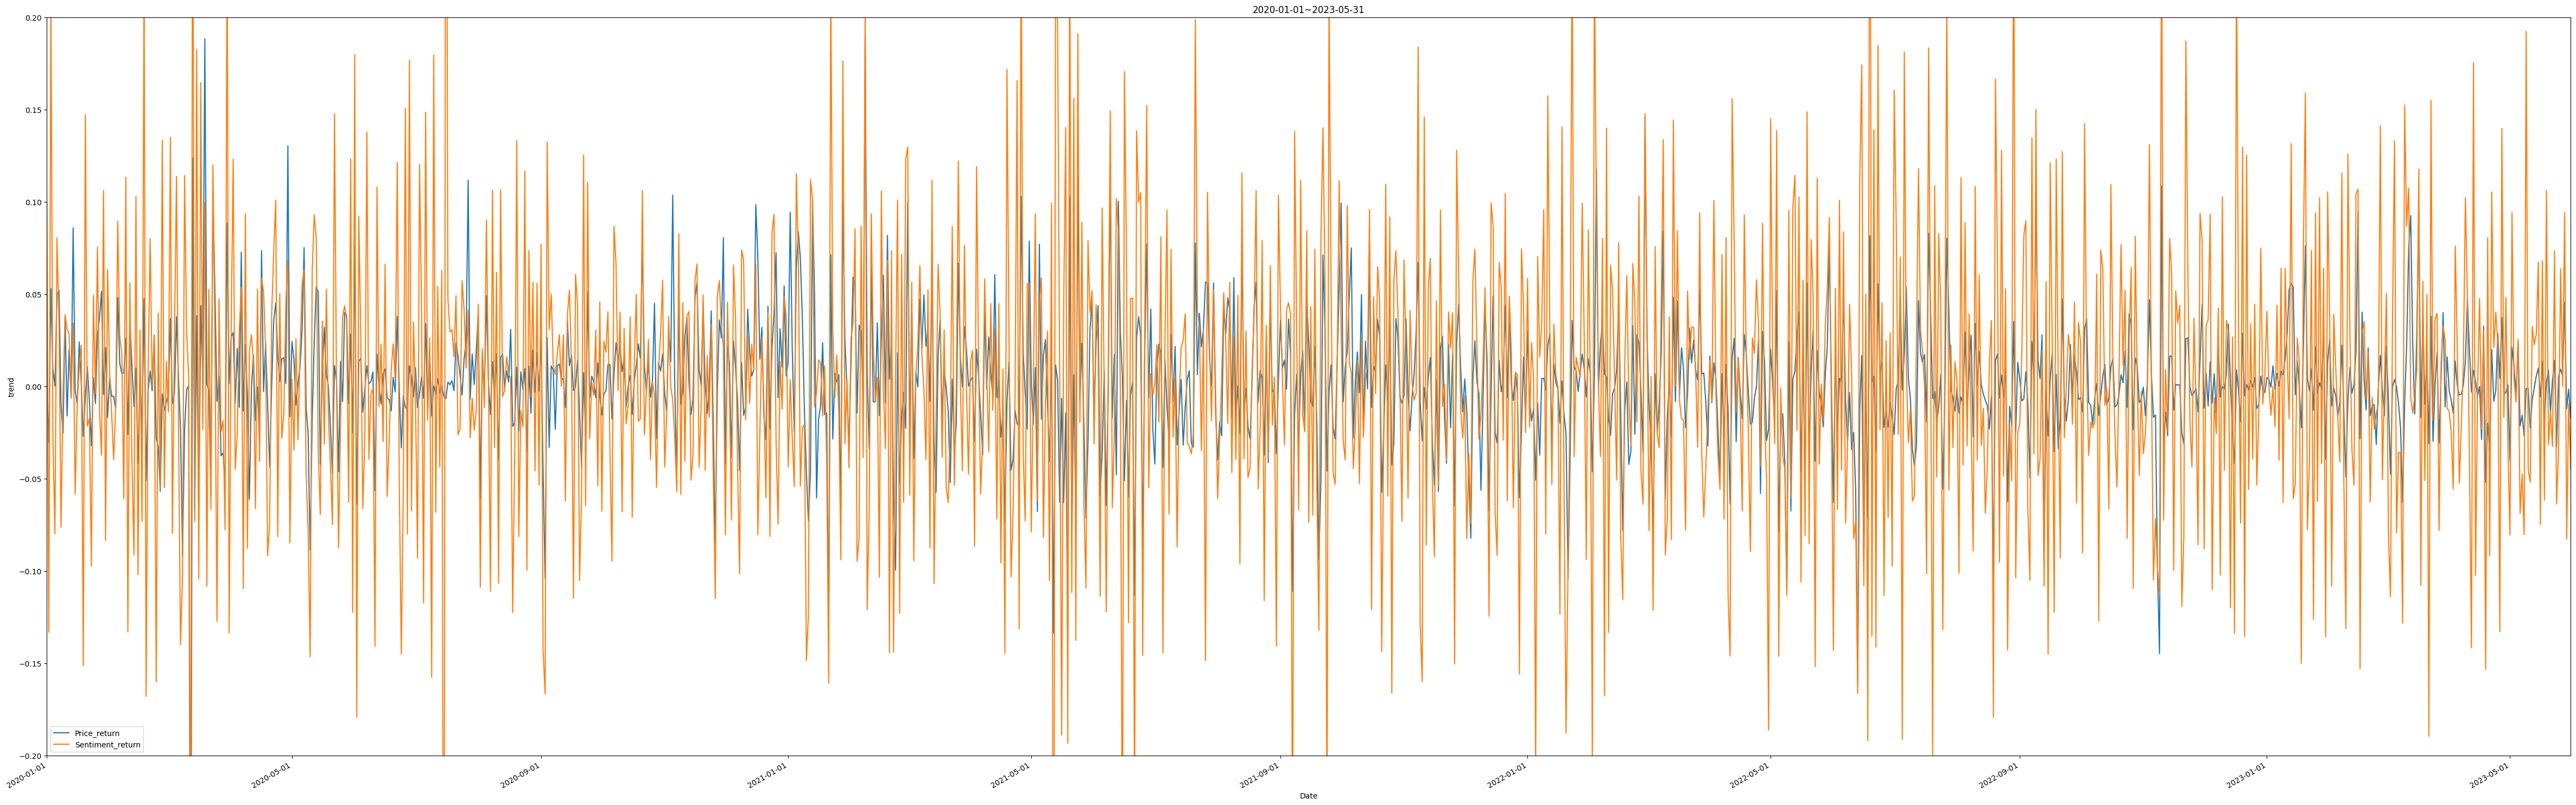

0.7457898957497995
1247
皮尔森相关系数为: 0.6102465476112708


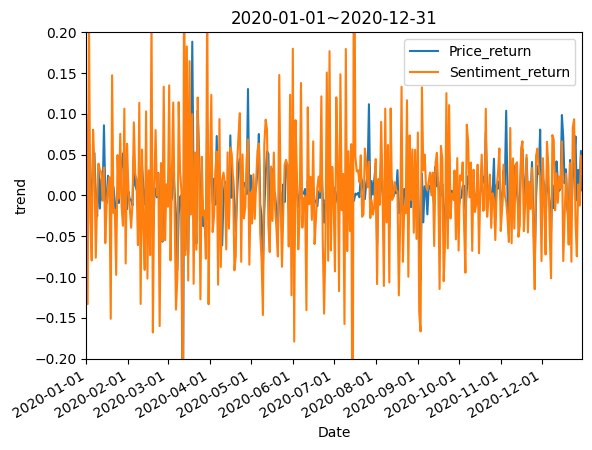

0.726775956284153
366
皮尔森相关系数为: 0.5571341938718976


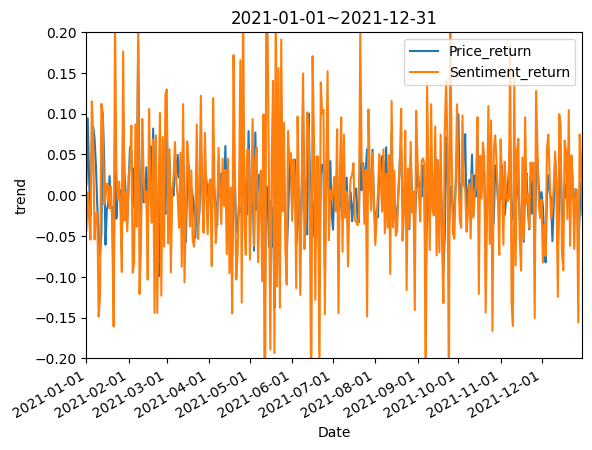

0.726027397260274
365
皮尔森相关系数为: 0.6312540099824933


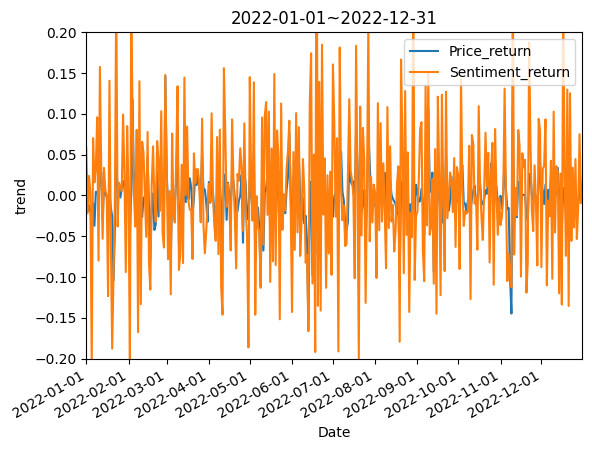

0.7698630136986301
365
皮尔森相关系数为: 0.6686640497781059


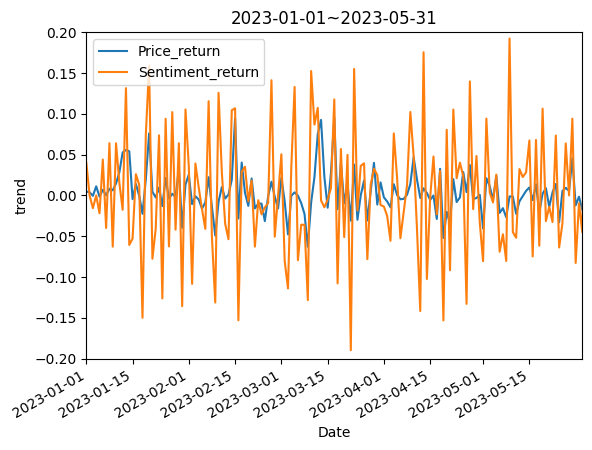

0.7814569536423841
151
皮尔森相关系数为: 0.5945227831821805


In [10]:
import re
from sklearn.preprocessing import MinMaxScaler
import numpy as np
sentiment = pd.read_csv(data_path,lineterminator='\n')
print(sentiment.columns)
# sentiment = pd.read_csv('data/all_filter.csv',lineterminator='\n')
sentiment = sentiment[sentiment['scores'].notnull()]
# filter
print(len(sentiment))
sentiment = sentiment[sentiment['label'] == 1]
print(len(sentiment))

print(len(sentiment))
thr = 100
sentiment = sentiment[(sentiment['user_follower_count'] > thr) | (sentiment['favorite_count'] > thr) | (sentiment['quote_count'] > thr) | (sentiment['reply_count'] > thr) | (sentiment['retweet_count'] > thr)]
print(len(sentiment))

sentiment['date'] = pd.to_datetime(sentiment['day'])
# 将日期列设置为索引
sentiment.set_index('date', inplace=True)
target = 'scores'
sentiment[target]  = sentiment[target].astype('str')
# sentiment['pos'] = sentiment['scores'].str.split('\n').map(lambda row: float(row[0][4:]) if row[0][4:] else 0)
sentiment['pos'] = sentiment[target].str.split('\n').map(lambda row: float(row[0][4:]))
sentiment['neg'] = sentiment[target].str.split('\n').map(lambda row: float(row[1][4:]))
sentiment['neu'] = sentiment[target].str.split('\n').map(lambda row: float(row[2][4:]))
# sentiment['compound'] = sentiment[target].str.split('\n').map(lambda row: float(row[3][9:]))
# sentiment['metrics'] = sentiment['pos'] - sentiment['neg']
# print(sentiment)
# print(sentiment.groupby(sentiment.index)['date'])
# 按天求和
# sentiment = sentiment.groupby(sentiment.index)['metrics'].mean().reset_index()
sentiment = sentiment.groupby(sentiment.index)[['pos','neg','neu']].mean().reset_index()
sentiment['metrics'] = sentiment['pos'] - sentiment['neg']
# sentiment['metrics'] = sentiment['compound']
# sentiment = sentiment['metrics']
# print(sentiment)
# 过滤outlier
# sentiment = sentiment[sentiment['metrics']>10000]
# sentiment = sentiment[sentiment['metrics']<16000]

# 平移
# sentiment.set_index('date', inplace=True)
# sentiment.index = sentiment.index.shift(1, freq='D')
# sentiment = sentiment.reset_index()

# 归一化
scaler = MinMaxScaler()
sentiment[['metrics']]= scaler.fit_transform(sentiment[['metrics']])
# 滑动窗口平滑
# window_size = 1 # 窗口大小
# sentiment['metrics'] = sentiment['metrics'].rolling(window_size).mean()


# 差分计算
# print(sentiment['metrics'][0:10])
sentiment['metrics_return'] = sentiment['metrics'].pct_change()
sentiment = sentiment[sentiment['metrics_return'] < 9999]
# print(sentiment[sentiment['metrics_return'] > 1])



df['value_return'] = df['value'].pct_change()
# print(df[256:262])
df = df[df['value_return'] < 9999]

# print(df[df['value_return'] > 1])
# df['value']
# price_return[0:10]


# 绘制价格走势图
trend = sentiment['metrics_return'].tolist()
sen_dates = sentiment['date'].tolist()
dates = list(df['timestamp'])
prices = list(df['value_return'])
print(trend)
print(prices)
def show_trend(start, end, flag):
    if flag == 1:
        plt.figure(figsize=(60, 20))
    plt.plot(dates, prices,label='Price_return')

    plt.plot(sen_dates, trend,label='Sentiment_return')

    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gcf().autofmt_xdate()
    plt.xlabel('Date')
    plt.ylabel('trend')
    plt.title(start+'~'+end)
    plt.ylim(-0.2,0.2)
    plt.xlim(pd.Timestamp(start), pd.Timestamp(end))
    plt.legend()
    plt.show()

    global sentiment
    sentiment = sentiment[sentiment['metrics_return'].notnull()]
    join = pd.merge(sentiment,df,left_on='date',right_on='timestamp')
    join = join[(join['date']>= pd.Timestamp(start)) & (join['date'] <= pd.Timestamp(end))]
    # print(join)
    
    t1 = join['metrics_return'].to_list()
    t2 = join['value_return'].to_list()
    good = 0
    for i in range(len(t1)):
        if t1[i] * t2[i] > 0:
            good = good + 1
    print(good/len(t1))
    date = join['date'].to_list()
    corr = np.corrcoef(t1, t2)[0, 1]
    print(len(date))
    print("皮尔森相关系数为:", corr)
show_trend('2020-01-01', '2023-05-31', 1)
# show_trend('2020-01-01', '2020-01-31', 0)
# show_trend('2021-01-01', '2021-01-31', 0)
show_trend('2020-01-01', '2020-12-31', 0)
show_trend('2021-01-01', '2021-12-31', 0)
show_trend('2022-01-01', '2022-12-31', 0)
show_trend('2023-01-01', '2023-05-31', 0)

# 导出数据用于预测模型

In [9]:
import re
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
data_path = 'data/all_filter_update_2500.csv'
sentiment = pd.read_csv(data_path,lineterminator='\n')
# sentiment = pd.read_csv('data/all_filter.csv',lineterminator='\n')
sentiment = sentiment[sentiment['scores'].notnull()]
# filter
print(len(sentiment))
sentiment = sentiment[sentiment['label'] == 1]
print(len(sentiment))

print(len(sentiment))
thr = 100
sentiment = sentiment[(sentiment['user_follower_count'] > thr) | (sentiment['favorite_count'] > thr) | (sentiment['quote_count'] > thr) | (sentiment['reply_count'] > thr) | (sentiment['retweet_count'] > thr)]
print(len(sentiment))

sentiment['date'] = pd.to_datetime(sentiment['day'])
# 将日期列设置为索引
sentiment.set_index('date', inplace=True)
sentiment['scores']  = sentiment['scores'].astype('str')
# sentiment['pos'] = sentiment['scores'].str.split('\n').map(lambda row: float(row[0][4:]) if row[0][4:] else 0)
sentiment['pos'] = sentiment['scores'].str.split('\n').map(lambda row: float(row[0][4:]))
sentiment['neg'] = sentiment['scores'].str.split('\n').map(lambda row: float(row[1][4:]))
sentiment['neu'] = sentiment['scores'].str.split('\n').map(lambda row: float(row[2][4:]))
# sentiment['metrics'] = sentiment['pos'] - sentiment['neg']
pd.set_option('display.max_rows', None)
print(sentiment.groupby(sentiment.index).size())
pd.reset_option('display.max_rows')

# 按天求和
sentiment = sentiment.groupby(sentiment.index)[['pos','neg','neu']].mean().reset_index()
print(sentiment)
# 平移一天
# sentiment.set_index('date', inplace=True)
# sentiment.index = sentiment.index.shift(1, freq='D')
# sentiment = sentiment.reset_index()
# sentiment


2981357
1841668
1841668
1571604
date
2008-10-30       1
2009-02-18       1
2009-04-22       1
2011-04-21       1
2011-04-29       1
2011-05-01       1
2011-05-05       1
2011-05-15       1
2011-05-16       1
2011-05-20       1
2011-06-01       1
2011-06-06       1
2011-06-18       1
2011-06-20       1
2011-07-15       1
2011-08-26       2
2011-09-07       1
2011-09-19       1
2011-09-29       1
2011-10-17       1
2011-10-25       1
2011-11-27       1
2011-11-28       1
2011-12-20       1
2011-12-29       1
2012-06-15       1
2012-07-26       1
2012-08-06       1
2012-08-24       1
2012-11-07       1
2012-11-13       1
2012-11-28       1
2013-02-26       1
2013-03-04       1
2013-03-05       1
2013-03-15       1
2013-03-20       1
2013-03-29       2
2013-04-01       1
2013-04-03       1
2013-04-09       1
2013-04-10       2
2013-04-16       2
2013-07-03       1
2013-07-30       1
2013-08-23       1
2013-08-29       1
2013-08-30       1
2013-09-29       1
2013-10-23       1
2013-11-07   

In [2]:
data_path = 'data/all_filter_update_2500.csv'
df = pd.read_csv('data/BTC-USD.csv')
# df['timestamp'] = df['Date']
# df['value'] = df['Open']
df['Date'] = pd.to_datetime(df['Date'])
join = pd.merge(sentiment,df,left_on='date',right_on='Date')
join.to_csv('predict_model_train_data.csv',index=False)


In [12]:
sentiment['metrics'] = sentiment['pos'] - sentiment['neg']
sentiment['metrics_diff'] = sentiment['metrics'].diff()


data_path = 'data/all_filter_update_2500.csv'
df = pd.read_csv('data/BTC-USD.csv')
df['timestamp'] = df['Date']
df['value'] = df['Open']
df['timestamp'] = pd.to_datetime(df['timestamp'])

df['value_diff'] = df['value'].diff()

join = pd.merge(sentiment,df,left_on='date',right_on='timestamp')
# join = join[(join['date']>= pd.Timestamp('2020-01-01')) & (join['date'] <= pd.Timestamp('2023-05-31'))]
join = join.reset_index()
print(join)
count = 0
for i in range(len(join)):
    # print(join.at[0,'metrics_diff'])
    if join.at[i,'metrics_diff'] * join.at[i,'value_diff'] > 0:
        count = count + 1
print(count/len(join))


      index       date        pos        neg        neu    metrics  \
0         0 2015-01-14  33.781250  27.171875  23.328125   6.609375   
1         1 2015-01-15  21.812500  37.812500  20.234375 -16.000000   
2         2 2015-01-16  29.984375  26.140625  24.843750   3.843750   
3         3 2015-01-19  28.875000  19.953125  21.437500   8.921875   
4         4 2015-01-22  34.156250  24.031250  21.562500  10.125000   
...     ...        ...        ...        ...        ...        ...   
1677   1677 2023-06-24  31.443750  23.309375  23.753125   8.134375   
1678   1678 2023-06-25  30.492188  23.000000  23.234375   7.492188   
1679   1679 2023-06-26  26.496094  24.852539  25.224609   1.643555   
1680   1680 2023-06-27  29.611779  22.544471  24.409856   7.067308   
1681   1681 2023-06-28  30.712054  21.765346  23.313058   8.946708   

      metrics_diff        Date          Open          High           Low  \
0        -7.546875  2015-01-14    223.893997    223.893997    171.509995   
1      

In [8]:
data_path = 'data/all_filter_update_2500.csv'
df = pd.read_csv('data/BTC-USD.csv')
df['timestamp'] = df['Date']
df['value'] = df['Open']
df['timestamp'] = pd.to_datetime(df['timestamp'])


join = pd.merge(sentiment,df,left_on='date',right_on='timestamp')


# 归一化
scaler = MinMaxScaler()
join['metrics'] = join['pos'] - join['neg']

join[['metrics']]= scaler.fit_transform(join[['metrics']])
join[['value']]= scaler.fit_transform(join[['value']])

join['metrics_return'] = join['metrics'].pct_change()
join['value_return'] = join['value'].pct_change()

join = join[join['metrics_return'] < 9999]
join = join[join['value_return'] < 9999]

join = join[(join['date']>= pd.Timestamp('2020-01-01')) & (join['date'] <= pd.Timestamp('2023-05-31'))]


print(join['metrics_return'].corr(join['value_return']))

0.6108161171949624
